In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [22]:
# Importing data files

mortality_data_df = pd.read_csv("Resources/mortality_2006_2010_clean.csv")

mortality_data_df.head()


,Unnamed: 0,Unnamed: 0.1,Year,ICD-10 113 Cause List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [26]:
mortality_data_df['ICD-10 113 Cause List'] = mortality_data_df['ICD-10 113 Cause List'].str.replace(r"\(.*\)","")
mortality_data_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,ICD-10 113 Cause List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [28]:
mortality_data_df.rename(columns = {"ICD-10 113 Cause List": "Cause_List"},  inplace = True)
mortality_data_df.head()         

,Unnamed: 0,Unnamed: 0.1,Year,Cause_List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia,GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8


In [30]:
death_cause_df = mortality_data_df.groupby(['Cause_List']).agg({'Deaths': [np.sum]})
death_cause_df

,Deaths
,sum
Cause_List,
Asthma,772.0
"Bronchitis, chronic and unspecified",53.0
Chronic lower respiratory diseases,46240.0
Emphysema,3180.0
Influenza,246.0
Influenza and pneumonia,24530.0
Other chronic lower respiratory diseases,40385.0
Other diseases of respiratory system,7202.0


In [71]:
# rename columns
death_cause_df.columns = ['Total_mortality']
death_cause_df

,Total_mortality
Cause_List,
Asthma,772.0
"Bronchitis, chronic and unspecified",53.0
Chronic lower respiratory diseases,46240.0
Emphysema,3180.0
Influenza,246.0
Influenza and pneumonia,24530.0
Other chronic lower respiratory diseases,40385.0
Other diseases of respiratory system,7202.0
Pneumonia,24010.0


<IPython.core.display.Javascript object>


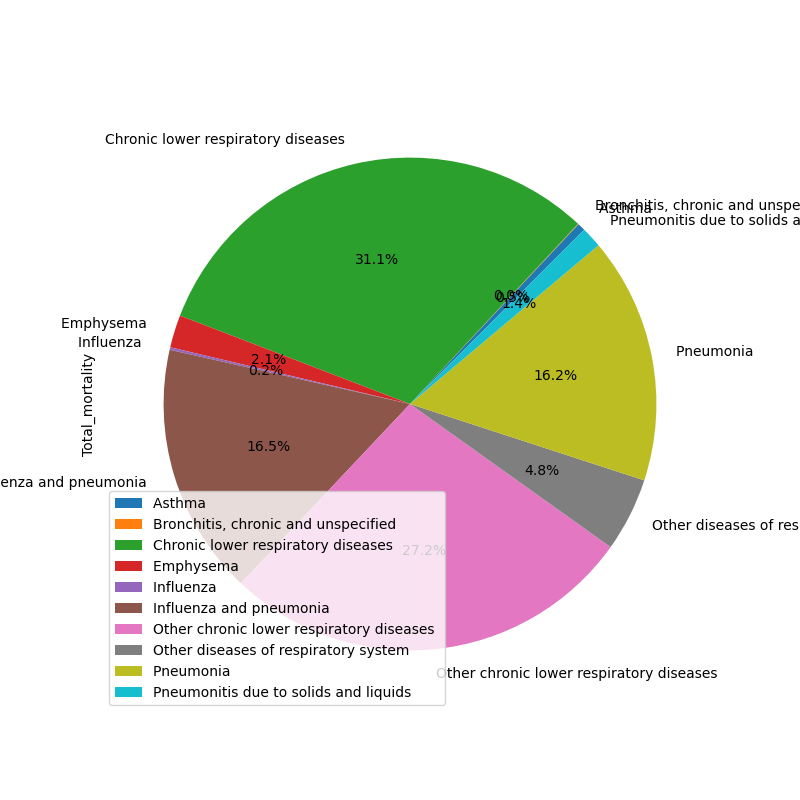

In [76]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

death_cause_df.plot(kind='pie', y='Total_mortality', subplots=False, shadow = False, startangle=45, legend = True,
figsize=(8,8), autopct='%1.1f%%')

